# Regression Lecture 2 - Model Generalization



# Overview
Plot a traning data set of $N$ = 10 points, shown as blue circles, each comparising an observation of the input variable $x$  along with the corresponding target variable $t$. The green curve shows the funcsion $sin(2\pi x)$ used to generate the data.
To predict the value of $y$ for some new value of $x$, polynominal curve having various degrees $M$ is shown as red curves in the figure.



# Agenda

1) To solve polynomial curve fitting and the problem of Overfitting

2) Effect of increased data size on overfitted model

3) Bias-variance tradeoff using Polynomial Curve Fitting example

4) Model Averaging

5) Train-Test Split

6) Cross-Validation




# 1) To solve polynomial curve fitting

① Implement the formula
\begin{equation*}
 \hat{y}(x, {\bf w}) = w_0 + w_1 x + w_1 x^2 + ...+ w_M x^M = \sum_{j=1}^M w_j x^M
\end{equation*}
where  $M$ is oder of polynominal. 

②To obtain parameter $w$, sum of the sequares of the errors between predictions and each data points $x_n$. 

\begin{equation*}
E({\bf w}) = \sum_{n=1}^N \{{ y_n -   \hat{y}({x_n, \bf w})}^2 \}
\end{equation*}

③Simultaneous equations can be solved to minimize above error.

\begin{equation*}
\sum_{j=0}^M {\bf A}_{ij} w_j = {\bf T}_i
\end{equation*}

\begin{equation*}
{\bf A}_{ij} = \sum_{n=1}^N (x_n)^{i+j} 
\end{equation*}

\begin{equation*}
{\bf T}_i = \sum_{n=1}^N (x_n)^i y_n 
\end{equation*}

# Respective Code

In [7]:
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def generate_data(N):
    mean = 0
    stdev = 0.3
    
    x = np.arange(0, 1, 1.0/N)
    f_x = np.sin(2*np.pi*x)
    y = f_x + np.random.normal(mean,stdev,N) 
 
    return (x, f_x, y)    

def predict(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

def solveMatrix(x, y, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            a = (x**(i+j))
            A[i,j] = (x**(i+j)).sum()
            #print("a {0}, A[i,j] {1} with i = {2} and j = {3}".format(a, A[i,j], i, j))
    T = np.array([((x**i)*y).sum() for i in range(M+1)])
    
    return  np.linalg.solve(A, T)

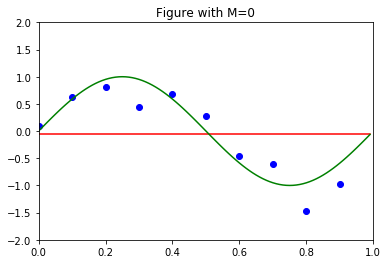

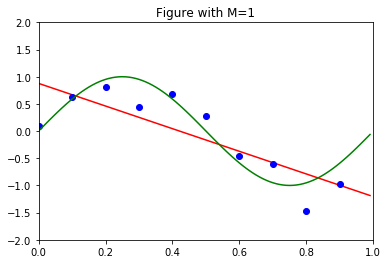

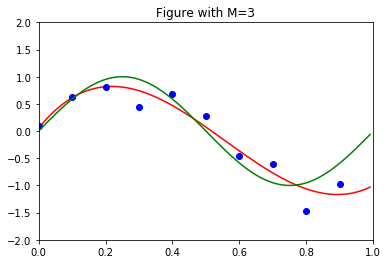

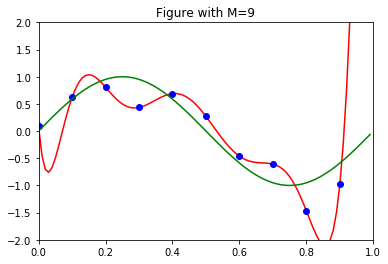

In [33]:
if __name__ == "__main__":
    #Sine curve
    N= 100
    x_real, f_real, y_real = generate_data(N) 
 
    ##Training Data
    N=10
    x_train, f_train, y_train = generate_data(N)
    
    for M in [0,1,3,9]:
        W = solveMatrix(x_train, y_train, M)   
        y_estimate = [predict(x, W, M) for x in x_real]
    
        plt.figure()
        plt.plot(x_real, y_estimate, 'r-')
        plt.plot(x_train, y_train, 'bo') 
        plt.plot(x_real, f_real, 'g-')
        xlim(0.0, 1.0)
        ylim(-2, 2)
        title("Figure with M="+str(M))
        

# Effect of increased data size on overfitted model

Now, the last figure with M=9 has resulted into an overfitted model. Now, lets visualize the effect of training data increase.

For that purpose, increase your training data.
As currenly, we have used synthetic dataset, so we can generate more data points by reducing the interval between values.

Using this, we can generate multiple datasets with x values ranging [0-1] having various intervals.

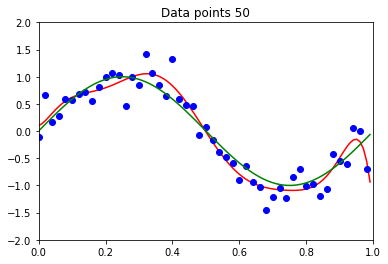

In [34]:
if __name__ == "__main__":
    
    M = 9
    N = 50
    x_train, f_train, y_train = generate_data(N)
    
    W = solveMatrix(x_train, y_train, M)
    
    y_estimate = [predict(x, W, M) for x in x_real]
    plt.figure()
    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo') 
    plt.plot(x_real, f_real, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Data points "+str(N))

Here, we can see that effect of overfitting is significantly reduced by adding more data points.
As in real life problems, data is not available sufficiently. So we use other approaches to deal with overfitting.

# 3) Bias-variance tradeoff using Polynomial Curve Fitting example

Using the similar example, we can demonstrate the effect of Bias-variance tradeoff.
As variance is dependent on the model complexity, Hence here again we will be taking three differnt models for experimentation purpose.

Firstly model averaging will be carried out using synthetic dataset.
Later on, bias and variance of models with varying complexity will be calculated.

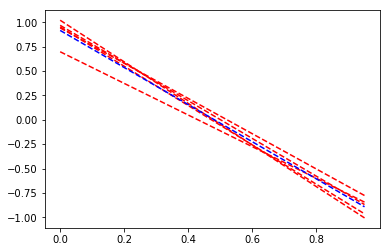

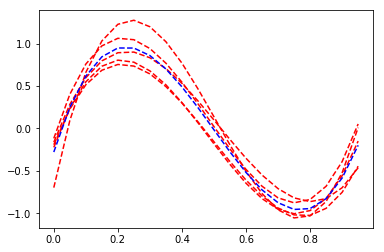

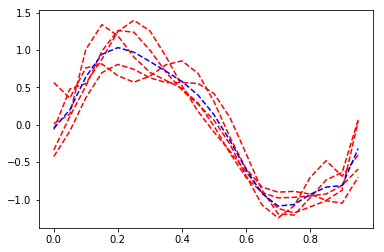

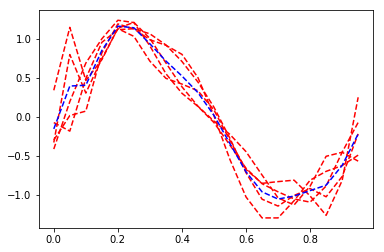

In [35]:
#import pylab as pl
def plotModelAverage(N, M):
    totalModelPerDegree = 5
    avg_y = np.zeros(N)
    plt.figure()
    for i in xrange(totalModelPerDegree):
        (x,f,y) = generate_data(N)
        W = solveMatrix(x, y, M)
        y_estimate = [predict(x_i, W, M) for x_i in x]       
        avg_y = avg_y + y_estimate
        plt.plot(x, y_estimate, 'r--')
    avg_y = avg_y / totalModelPerDegree
    plt.plot(x, avg_y, 'b--')

N= 20
plotModelAverage(N, 1)
plotModelAverage(N, 3)
plotModelAverage(N, 9)
plotModelAverage(N, 12)   

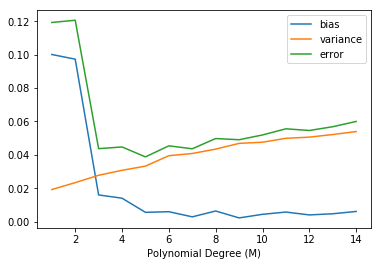

In [36]:
N = 20
x_org, f_org, y_org = generate_data(N)
n_models = 100
max_poly_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in xrange(1, max_poly_degree):
    avg_y = np.zeros(N)
    models = []
    for i in xrange(n_models):
        (x,f,y) = generate_data(N)
        W = solveMatrix(x, y, degree)
        y_estimate = [predict(x_i, W, degree) for x_i in x]       
        avg_y = avg_y + y_estimate
        models.append(y_estimate)
    avg_y = avg_y / n_models
    bias = (np.linalg.norm(f_org - avg_y))/N
    bias_vals.append(bias)
    variance = 0
    for y_estimate in models:
        variance += np.linalg.norm(y_estimate - avg_y)
    variance /= (N * n_models)
    var_vals.append(variance)
    error_vals.append(variance + bias)

plt.plot(range(1, max_poly_degree), bias_vals, label='bias')
plt.plot(range(1, max_poly_degree), var_vals, label='variance')
plt.plot(range(1, max_poly_degree), error_vals, label='error')
plt.xlabel("Polynomial Degree (M)")
plt.legend()

# Train-Test Split
As in real life, we are not aware of the actual function f(x). Hence, a widely used method is to split the dataset into training and testing sets.
Train set is used only for training, whereas generalization is evaluated on testing set.

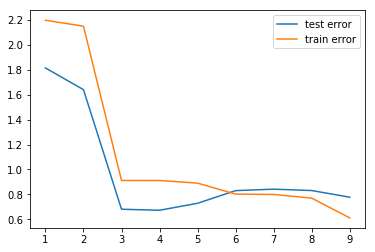

In [37]:
N = 20
# train sample
train_N = int(N * 0.8)
# print(train_N)
(train_x,f, train_y) = generate_data(train_N)
# validation sample
test_x,f, test_y = generate_data(N - train_N)
max_degree = 10
test_error_vals = []
train_error_vals = []
for degree in xrange(1, max_degree):
    W = solveMatrix(train_x, train_y, degree)
    y_estimate = [predict(x_i, W, degree) for x_i in train_x]
    train_error_vals.append(np.linalg.norm(train_y - y_estimate))
    y_estimate = [predict(x_i, W, degree) for x_i in test_x]
    test_error_vals.append(np.linalg.norm(test_y - y_estimate))
plt.plot(range(1, max_degree), test_error_vals, label='test error')
plt.plot(range(1, max_degree), train_error_vals, label='train error')
plt.legend()

# Cross Validation
Train test split methodology does not exhaust the available dataset. Hence, a more comprehensive approach widely known as K-cross validation is used. Here K determines the number of folds to make.
If value of K is greater than actual training data, error is generated.

Error against Model 1 at every fold
[ 0.01072945  0.01781851  0.00571732  0.01334423  0.03206398]
Mean Testing error 0.0159346976244
Error against Model 2 at every fold
[ 0.01135337  0.01296363  0.0044781   0.00493918  0.02392287]
Mean Testing error 0.0115314305663
Error against Model 3 at every fold
[  3.98989572e+02   1.24321729e-02   5.30084506e-03   1.96460137e-02
   7.86814948e+02]
Mean Testing error 237.168379816


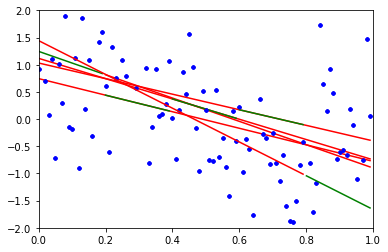

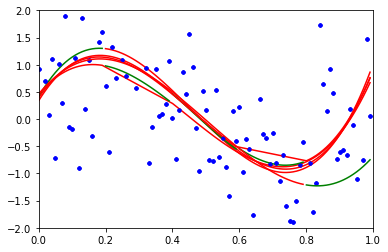

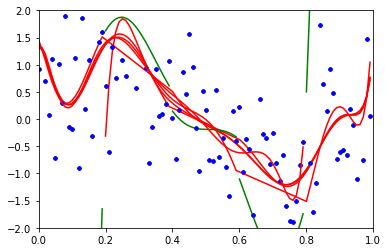

In [31]:

import sklearn.utils as sk

N = 100
(x,f,y) = generate_data(N)

#x, y = sk.shuffle(x_train4,y_train4)

from sklearn.model_selection import KFold
n_splits=5
kf = KFold(n_splits)
kf.get_n_splits(x, y)

Model1 = list()
Model2 = list()
Model3 = list()

modelResid1_tr = list()
modelResid2_tr = list()
modelResid3_tr = list()

modelResid1_te = list()
modelResid2_te = list()
modelResid3_te = list()

plt.figure()
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    M = 1
    W = solveMatrix(x_train, y_train, M)
    y_estimate_train = [predict(i, W, M) for i in x_train]
    y_estimate_test = [predict(i, W, M) for i in x_test]
    
    #lt.subplot(2,2,1)
    plt.plot(x_train, y_train, 'b.') 
    plt.plot(x_train, y_estimate_train, 'r-')
    plt.plot(x_test, y_estimate_test, 'g-')

    xlim(0.0, 1.0)
    ylim(-2, 2)
    Model1.append(y_estimate_test)
    modelResid1_te.append(((y_test - y_estimate_test)**2)/N)
    modelResid1_tr.append(((y_train - y_estimate_train)**2)/N)

plt.figure()
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    M = 3
  
    #lt.subplot(2,2,2)
    W = solveMatrix(x_train, y_train, M)
    y_estimate_train = [predict(i, W, M) for i in x_train]
    y_estimate_test = [predict(i, W, M) for i in x_test]
    
    plt.plot(x_train, y_train, 'b.') 
    plt.plot(x_train, y_estimate_train, 'r-')
    plt.plot(x_test, y_estimate_test, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    Model2.append(y_estimate_test)
    modelResid2_te.append(((y_test - y_estimate_test)**2)/N)
    modelResid2_tr.append(((y_train - y_estimate_train)**2)/N)

plt.figure()
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    M = 9
    
    #lt.subplot(2,2,3)
    W = solveMatrix(x_train, y_train, M)
    y_estimate_train = [predict(i, W, M) for i in x_train]
    y_estimate_test = [predict(i, W, M) for i in x_test]
    
    plt.plot(x_train, y_train, 'b.') 
    plt.plot(x_train, y_estimate_train, 'r-')
    plt.plot(x_test, y_estimate_test, 'g-')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    Model3.append(y_estimate_test)
    modelResid3_te.append(((y_test - y_estimate_test)**2)/N)
    modelResid3_tr.append(((y_train - y_estimate_train)**2)/N)

print("Error against Model 1 at every fold")
print(np.mean(modelResid1_te,1))
print("Mean Testing error {0}".format(np.mean(modelResid1_te)))

print("Error against Model 2 at every fold")
print(np.mean(modelResid2_te,1))
print("Mean Testing error {0}".format(np.mean(modelResid2_te)))

print("Error against Model 3 at every fold")
print(np.mean(modelResid3_te,1))
print("Mean Testing error {0}".format(np.mean(modelResid3_te)))

#plt.subplot(2,2,4)
#plt.plot(np.mean(modelResid1_te,1))
#plt.plot(np.mean(modelResid2_te,1))
#plt.plot(np.mean(modelResid3_te,1))